In [2]:
#Description: This is a python program for cryptocurrency analysis

In [3]:
# Import the Libraries
import numpy as np
import pandas as pd

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving BT.csv to BT.csv
Saving ETH.csv to ETH.csv
Saving LTC.csv to LTC.csv


In [5]:
#Store the data into DataFrames
df_btc= pd.read_csv('BT.csv')
df_eth= pd.read_csv('ETH.csv')
df_ltc= pd.read_csv('LTC.csv')

In [6]:
#Print the first 5 rows of Bitcoin data 
df_btc.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2021,28994.00977,29600.62695,28803.58594,29374.15234,29374.15234,4.073030e+10
1,1/2/2021,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10
2,1/3/2021,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10
3,1/4/2021,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10
4,1/5/2021,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10


In [7]:
#Print the first 5 rows of ETH data
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2021,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
1,1/2/2021,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2,1/3/2021,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
3,1/4/2021,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
4,1/5/2021,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


In [8]:
#Print the first 5 rows of LTC data
df_ltc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2021,124.672768,133.185760,123.328079,126.230347,126.230347,7326980728
1,1/2/2021,126.272964,140.372574,123.693619,136.944885,136.944885,10532067985
2,1/3/2021,136.949402,163.898636,135.739914,160.190582,160.190582,15385661271
3,1/4/2021,160.271164,173.027817,143.623962,154.807327,154.807327,13659785704
4,1/5/2021,154.897552,162.850189,147.400070,158.594772,158.594772,10192818976


In [9]:
# Create a new dataframe that holds the clsoing price of all 3 crypto currencies
df= pd.DataFrame({ 'BTC': df_btc['Close'],'ETH': df_eth['Close'],'LTC': df_ltc['Close']} )

In [10]:
# Show the new dataframe
df

,BTC,ETH,LTC
0,29374.15234,730.367554,126.230347
1,32127.26758,774.534973,136.944885
2,32782.02344,975.507690,160.190582
3,31971.91406,1040.233032,154.807327
4,33992.42969,1100.006104,158.594772
...,...,...,...
360,50640.41797,4037.547607,155.881226
361,47588.85547,3800.893066,145.886871
362,46444.71094,3628.531738,145.512619
363,47178.12500,3713.852051,148.286011


In [11]:
# Get statitics on the data
df.describe()

,BTC,ETH,LTC
count,365.000000,365.000000,365.000000
mean,47436.932021,2778.354149,185.880909
std,9787.634672,1023.543690,48.206828
min,29374.152340,730.367554,107.399483
25%,38347.062500,1895.552124,152.144089
50%,47783.359380,2633.518311,178.659424
75%,56216.183590,3638.122070,202.967987
max,67566.828130,4812.087402,386.450775


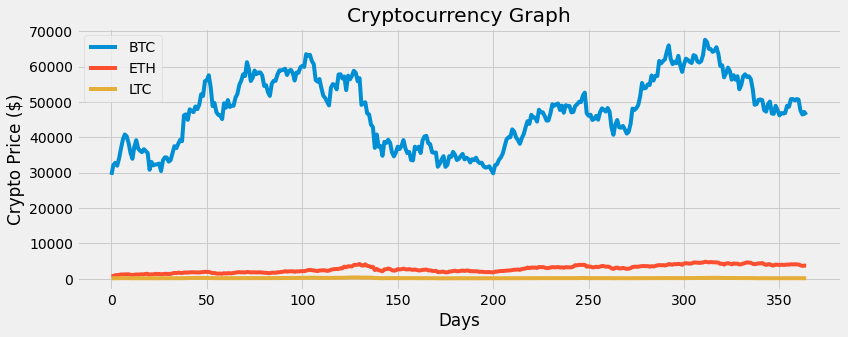

In [12]:
# Visualize the cryptocurrencies closing prices
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5) )
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label= c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [13]:
# Scale the data 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range= (0, 100))
scale = min_max_scaler.fit_transform(df)
scale



array([[ 0.        ,  0.        ,  6.74817302],
       [ 7.20849007,  1.08207865, 10.58780333],
       [ 8.92283934,  6.00580503, 18.91806292],
       ...,
       [44.69589587, 71.00350568, 13.65811128],
       [46.61619615, 73.09380869, 14.65197588],
       [44.33387454, 72.3289537 , 14.01722842]])

In [14]:
# Convert the scaled data into a dataframe
df_scale= pd.DataFrame(scale, columns = df.columns) 

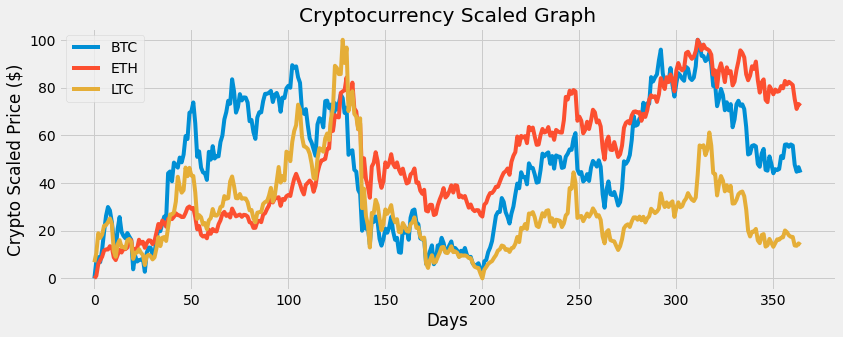

In [16]:
# Visualize the Scaled data
my_crypto = df_scale

plt.figure(figsize= (12.4, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label= c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')  
plt.show()

In [17]:
# Get the daily simple returns
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.093726,0.060473,0.084881
2,0.020380,0.259475,0.169745
3,-0.024712,0.066350,-0.033605
4,0.063197,0.057461,0.024466
...,...,...,...
360,-0.003328,-0.007322,-0.000712
361,-0.060259,-0.058613,-0.064115
362,-0.024042,-0.045348,-0.002565
363,0.015791,0.023514,0.019059


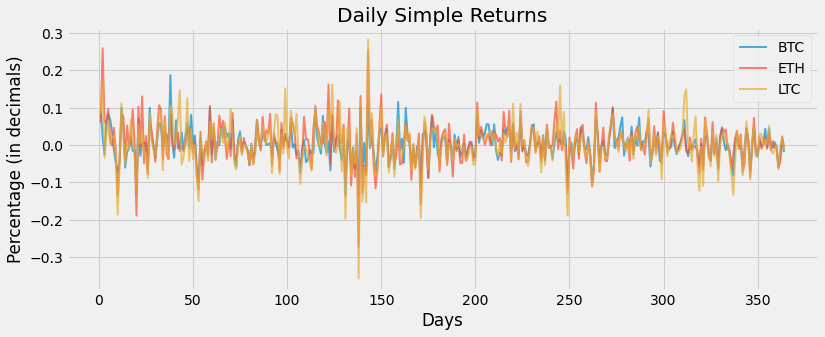

In [20]:
# Visualize the daily simple returns
plt.figure(figsize= (12, 4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label= c, lw= 2, alpha= 0.7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimals)')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')  
plt.show()

In [21]:
# Get the volatility 
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.042144
ETH    0.056068
LTC    0.061123
dtype: float64

In [22]:
# Show the mean / average daily simple return
DSR.mean()

BTC    0.002135
ETH    0.006027
LTC    0.002333
dtype: float64

In [23]:
# Get the correlation 
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.761567,0.777744
ETH,0.761567,1.000000,0.799871
LTC,0.777744,0.799871,1.000000


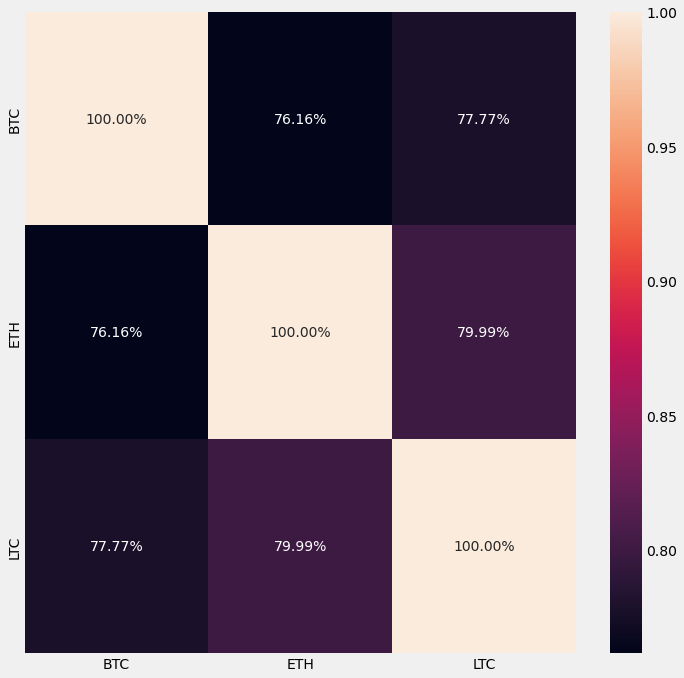

In [24]:
# Visualize the correlation
import seaborn as sns

plt.subplots(figsize= (11, 11))
sns.heatmap(DSR.corr(), annot= True, fmt= '0.2%')

In [25]:
# Get the daily cumulative simple returns
DCSR = (DSR+1).cumprod()

#show
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,1.093726,1.060473,1.084881
2,1.116016,1.335639,1.269034
3,1.088437,1.424260,1.226388
4,1.157222,1.506099,1.256392
...,...,...,...
360,1.723979,5.528104,1.234895
361,1.620093,5.204083,1.155719
362,1.581142,4.968090,1.152755
363,1.606110,5.084908,1.174726


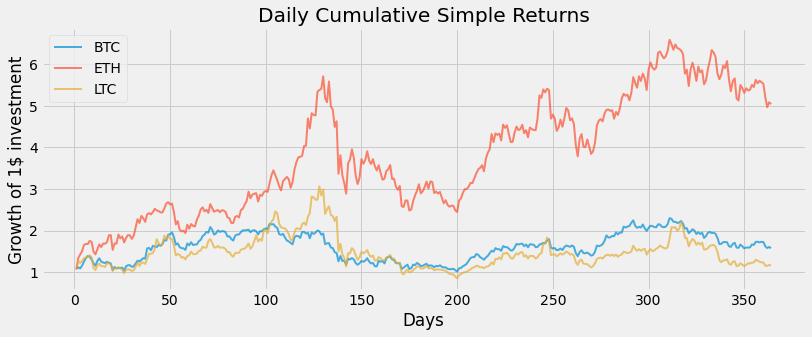

In [26]:
# Visualize the cumulative daily simple returns
plt.figure(figsize= (12.2, 4.5))

for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], label= c, lw= 2, alpha= 0.7)

plt.title('Daily Cumulative Simple Returns')
plt.ylabel('Growth of 1$ investment')
plt.xlabel('Days')
plt.legend(DCSR.columns.values, loc= 'upper left')  
plt.show()